### Que:Output variable y -> Whether the client has subscribed a term deposit or not 
### Binomial ("yes" or "no")

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bank-full.csv.zip")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
import seaborn as sns

<Axes: xlabel='Target', ylabel='count'>

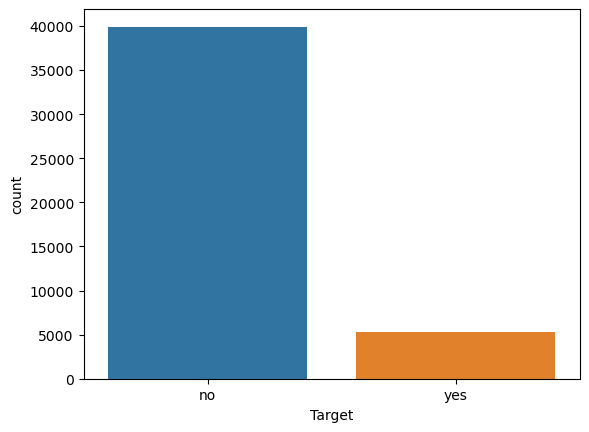

In [4]:
sns.countplot(x=df['Target'])

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [6]:
X = df.drop('Target', axis=1)

X = pd.get_dummies(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Target'], test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
import pickle
filename = 'final_model.sav'
pickle.dump(classifier, open(filename,'wb'))

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
df1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df1.head()

,Actual,Predicted
3776,0,0
9928,0,0
33409,0,0
31885,0,1
15738,0,0


In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8893066460245493

In [14]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[7806,  146],
       [ 855,  236]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
classi = classification_report(y_test,y_pred)
print(classi)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.62      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



In [16]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
y_prob = classifier.predict_proba(X_test)[:, 1]

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

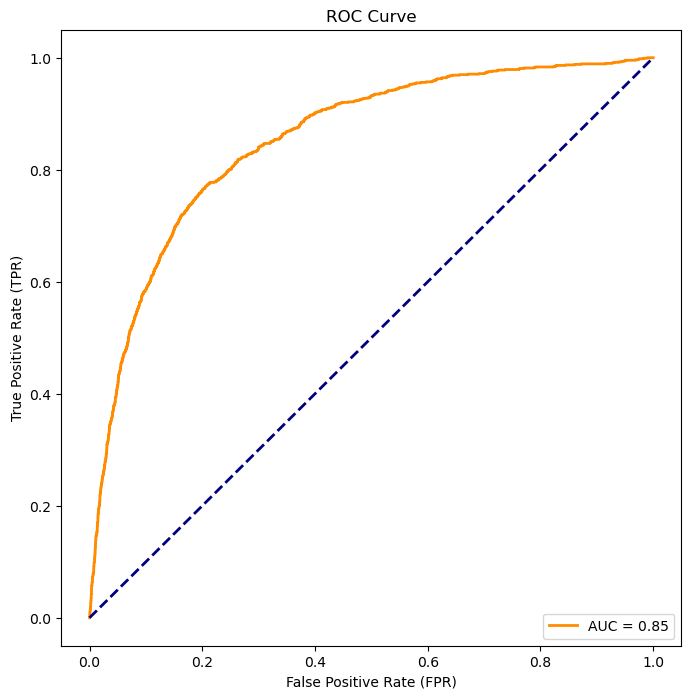

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

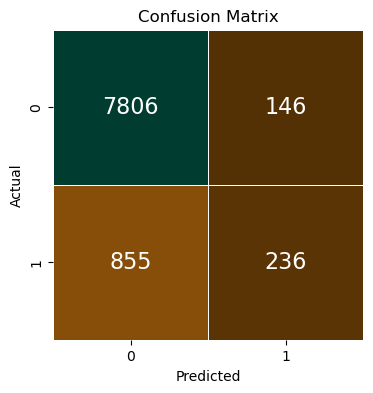

In [23]:
plt.figure(figsize=(4, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='BrBG', cbar=False,
            annot_kws={"size": 16}, linewidths=0.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Insights
* The ROC curve appears to be well above the diagonal line, indicating good discriminative ability.
* AUC(close to 1) suggests a better-performing model.